In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV


In [2]:
cz_df = pd.read_csv("cubic_zirconia.csv")

# 1	Problem Statement: 1

### 1.1	Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

### 1.2	Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [3]:
cz_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
cz_df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [5]:
cz_df.shape

(26967, 11)

In [6]:
cz_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [7]:
cz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
#drop the unnamed column
cz_df= cz_df.drop(columns='Unnamed: 0', axis=1)

#### Duplicate Data Imputation 

In [9]:
dups=cz_df.duplicated()
print('Number of duplicate rows = %d'%(dups.sum()))

Number of duplicate rows = 34


In [10]:
print('Before',cz_df.shape)
cz_df.drop_duplicates(inplace=True) 
print('After',cz_df.shape)

Before (26967, 10)
After (26933, 10)


In [11]:
dups=cz_df.duplicated()
print('Number of duplicate rows = %d'%(dups.sum()))

Number of duplicate rows = 0


#### Treating missing values

In [12]:
cz_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [13]:
#Imputing Missing Values using median
for column in cz_df.columns:
    if cz_df[column].dtype != 'object':
        median = cz_df[column].mean()
        cz_df[column] = cz_df[column].fillna(median)

In [14]:
cz_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### Treating data having 0 values


In [15]:
cz_df.loc[((cz_df['x'] == 0) | (cz_df['y'] == 0) | (cz_df['z'] == 0)|(cz_df['carat'] == 0)|
(cz_df['depth'] == 0)|(cz_df['table'] == 0)|(cz_df['price'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [16]:
cz_df.drop(cz_df[((cz_df['x'] == 0) | (cz_df['y'] == 0) | (cz_df['z'] == 0))].index, inplace=True)

In [17]:
cz_df.loc[((cz_df['x'] == 0) | (cz_df['y'] == 0) | (cz_df['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [18]:
cz_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.797821,0.477085,0.20,0.40,0.70,1.05,4.50
depth,26925.0,61.745566,1.393430,50.80,61.10,61.80,62.50,73.60
table,26925.0,57.455305,2.231327,49.00,56.00,57.00,59.00,79.00
x,26925.0,5.729385,1.126081,3.73,4.71,5.69,6.55,10.23
y,26925.0,5.733152,1.163820,3.71,4.71,5.70,6.54,58.90
z,26925.0,3.538820,0.717483,1.07,2.90,3.52,4.04,31.80
price,26925.0,3936.249991,4020.983187,326.00,945.00,2373.00,5353.00,18818.00


In [19]:
cz_df.shape

(26925, 10)

In [20]:
cz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [21]:
for column in cz_df.columns:
    if cz_df[column].dtype == 'object':
        print(column.upper(),':',cz_df[column].nunique())
        print(cz_df[column].value_counts().sort_values())
        print('\n')

CUT : 5
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR : 7
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY : 8
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




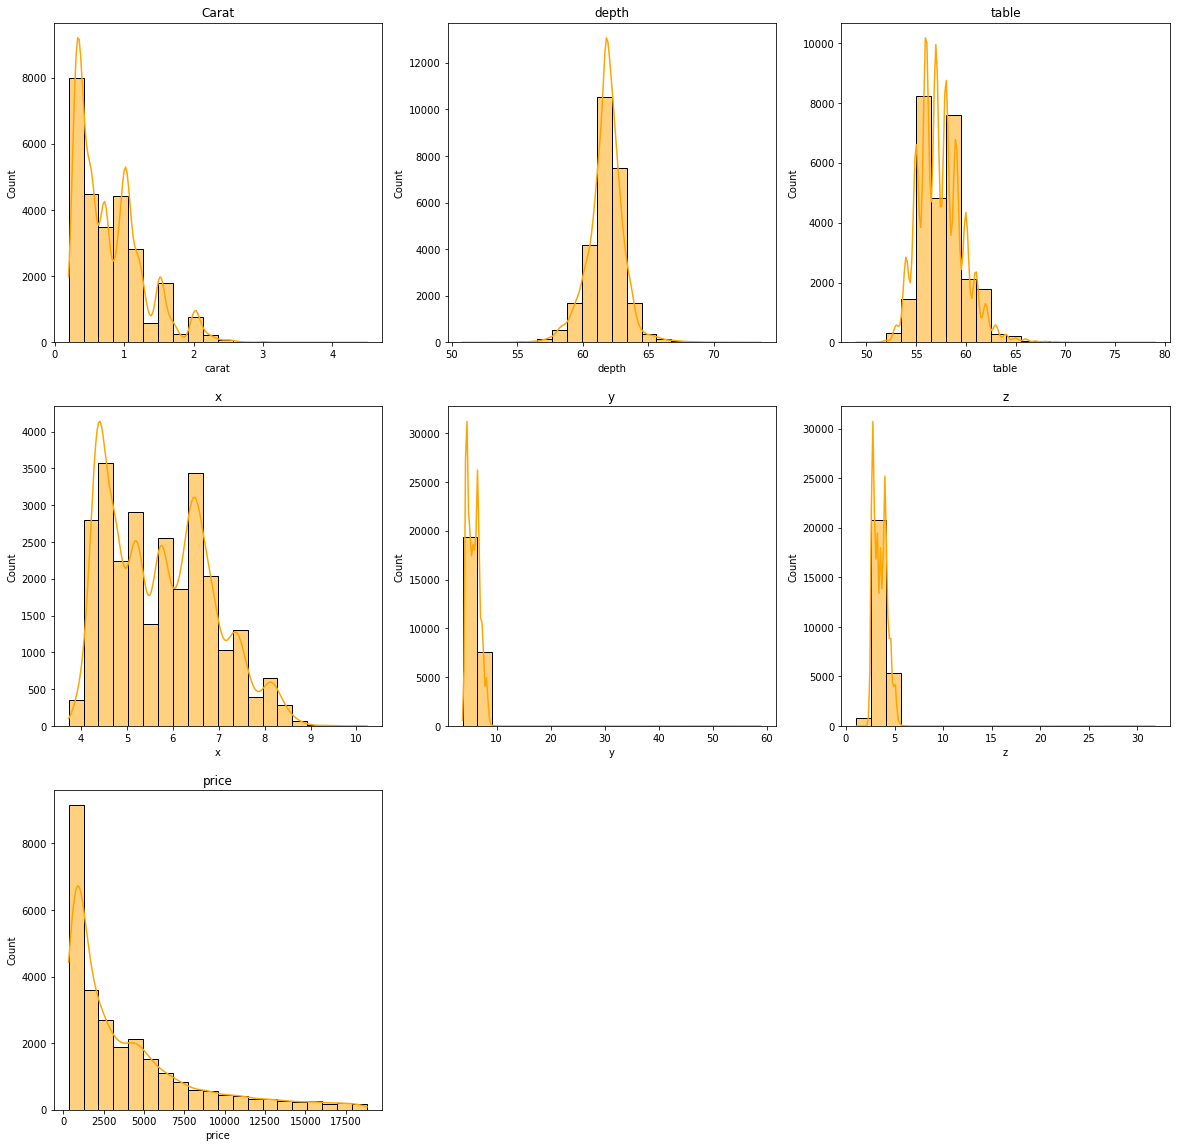

In [22]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1);
plt.title('Carat')
sns.histplot(cz_df.carat,bins=20,color="orange",kde=True);

plt.subplot(3,3,2)
plt.title('depth')
sns.histplot(cz_df.depth,bins=20,color="orange",kde=True);

plt.subplot(3,3,3)
plt.title('table')
sns.histplot(cz_df.table,bins=20,color="orange",kde=True);

plt.subplot(3,3,4)
plt.title('x')
sns.histplot(cz_df.x,bins=20,color="orange",kde=True);

plt.subplot(3,3,5)
plt.title('y')
sns.histplot(cz_df.y,bins=20,color="orange",kde=True);

plt.subplot(3,3,6)
plt.title('z')
sns.histplot(cz_df.z,bins=20,color="orange",kde=True);

plt.subplot(3,3,7)
plt.title('price')
sns.histplot(cz_df.price,bins=20,color="orange",kde=True);

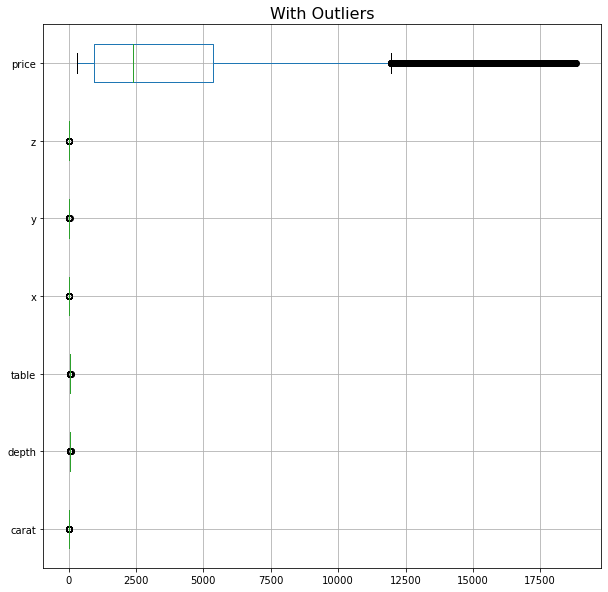

In [23]:
# construct box plot for continuous variables
cont=cz_df.dtypes[(cz_df.dtypes!='uint8') & (cz_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
cz_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
for column in cz_df[['carat', 'depth', 'table', 'x', 'y', 'z','price']].columns:
    lr,ur=remove_outlier(cz_df[column])
    cz_df[column]=np.where(cz_df[column]>ur,ur,cz_df[column])
    cz_df[column]=np.where(cz_df[column]<lr,lr,cz_df[column])

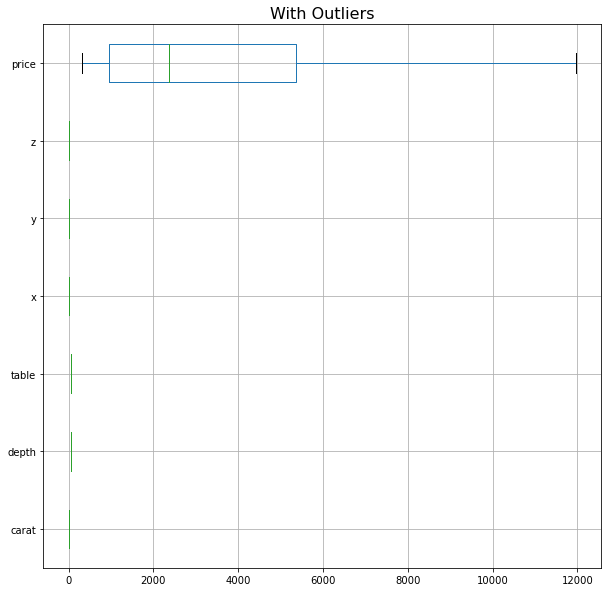

In [26]:
plt.figure(figsize=(10,10))
cz_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

<Figure size 1080x1080 with 0 Axes>

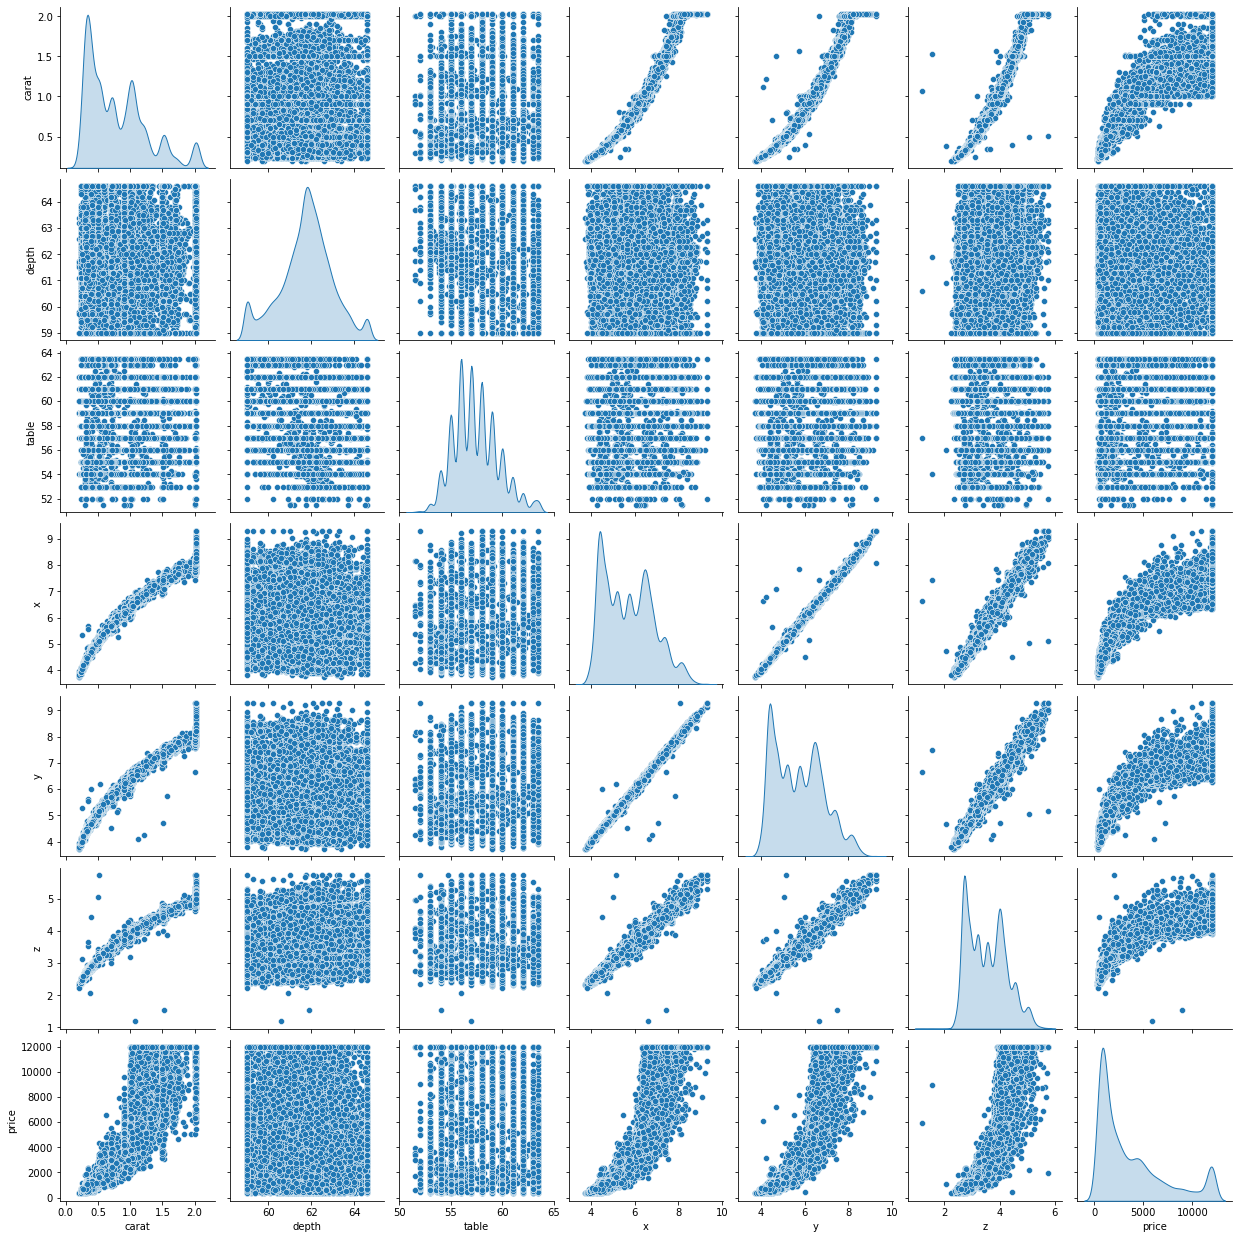

In [27]:
plt.figure(figsize=(15,15))
sns.pairplot(cz_df, diag_kind = 'kde', corner=False);

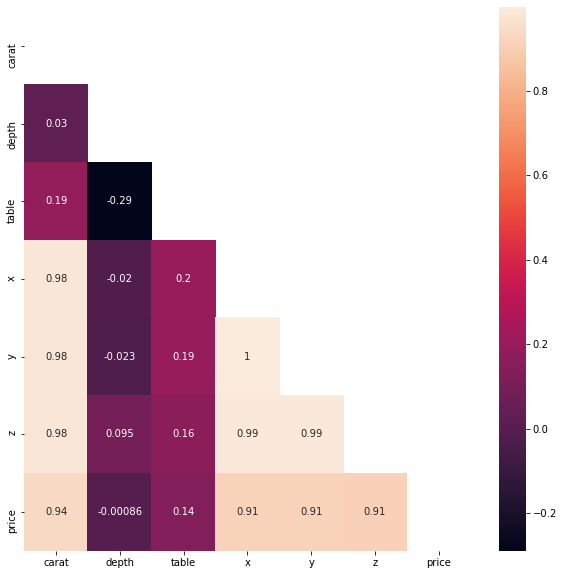

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(cz_df.corr(),annot=True,mask =np.triu(np.ones_like(cz_df.corr(), dtype=bool)));

### 1.3	Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### Linear Regression

### Model - 1

In [29]:
cz_en= pd.get_dummies(cz_df, columns=['cut','color','clarity'],drop_first=True)

In [30]:
cz_en.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
cz_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26925 non-null  float64
 1   depth          26925 non-null  float64
 2   table          26925 non-null  float64
 3   x              26925 non-null  float64
 4   y              26925 non-null  float64
 5   z              26925 non-null  float64
 6   price          26925 non-null  float64
 7   cut_Good       26925 non-null  uint8  
 8   cut_Ideal      26925 non-null  uint8  
 9   cut_Premium    26925 non-null  uint8  
 10  cut_Very Good  26925 non-null  uint8  
 11  color_E        26925 non-null  uint8  
 12  color_F        26925 non-null  uint8  
 13  color_G        26925 non-null  uint8  
 14  color_H        26925 non-null  uint8  
 15  color_I        26925 non-null  uint8  
 16  color_J        26925 non-null  uint8  
 17  clarity_IF     26925 non-null  uint8  
 18  clarit

In [32]:
cz_en.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.793119,0.461998,0.20,0.40,0.70,1.05,2.025
depth,26925.0,61.749239,1.218216,59.00,61.10,61.80,62.50,64.600
table,26925.0,57.435023,2.156704,51.50,56.00,57.00,59.00,63.500
x,26925.0,5.729217,1.125500,3.73,4.71,5.69,6.55,9.310
y,26925.0,5.731159,1.117494,3.71,4.71,5.70,6.54,9.285
z,26925.0,3.537625,0.695681,1.19,2.90,3.52,4.04,5.750
price,26925.0,3734.453965,3466.394724,326.00,945.00,2373.00,5353.00,11965.000
cut_Good,26925.0,0.090399,0.286758,0.00,0.00,0.00,0.00,1.000
cut_Ideal,26925.0,0.401300,0.490171,0.00,0.00,0.00,1.00,1.000
cut_Premium,26925.0,0.255525,0.436164,0.00,0.00,0.00,1.00,1.000


In [33]:
X = cz_en.drop('price', axis=1)

# Copy target into the y dataframe.
y = cz_en[['price']]

In [34]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [37]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (18847, 23)
X_test (8078, 23)
y_train (18847, 1)
y_test (8078, 1)


In [38]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [39]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0] [idx]))

The coefficient for carat is 9200.336626821463
The coefficient for depth is 12.387011169526165
The coefficient for table is -23.08429213992879
The coefficient for x is -1177.3863159028929
The coefficient for y is 1082.3347702739356
The coefficient for z is -640.4608264842769
The coefficient for cut_Good is 387.29874760284565
The coefficient for cut_Ideal is 629.8858957652236
The coefficient for cut_Premium is 598.672582564512
The coefficient for cut_Very Good is 502.39269944588887
The coefficient for color_E is -188.8757658538538
The coefficient for color_F is -231.23337497096648
The coefficient for color_G is -411.0818661557577
The coefficient for color_H is -831.5176210701098
The coefficient for color_I is -1330.1184456500287
The coefficient for color_J is -1861.610644676013
The coefficient for clarity_IF is 3995.2161849354998
The coefficient for clarity_SI1 is 2535.9074240164423
The coefficient for clarity_SI2 is 1712.1729307119385
The coefficient for clarity_VS1 is 3355.11856687227

In [40]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3079.9408597176566


In [41]:
# R square on training data
regression_model.score(X_train, y_train)

0.9404719027464119

In [42]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9416169664411843

In [43]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

843.7556057121486

In [44]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test) 
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

842.0881422033435

### Model - 2

### Linear Regression Using Stats Model

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [47]:
X.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [48]:
i=0
for column in X.columns:
    #if i < 11:
    print (column ," : ", vif[i]) 
    i = i+1

carat  :  124.38697910236743
depth  :  1408.1065778484779
table  :  1002.7510422325473
x  :  11995.43695408838
y  :  11519.97661050614
z  :  3445.225348927899
cut_Good  :  4.5042037429955935
cut_Ideal  :  18.175107078573742
cut_Premium  :  10.876252533152082
cut_Very Good  :  10.068095194720618
color_E  :  2.48083601777728
color_F  :  2.4477743396527827
color_G  :  2.795126309436099
color_H  :  2.303310756411084
color_I  :  1.931451739393131
color_J  :  1.5143275278518302
clarity_IF  :  3.675644196206025
clarity_SI1  :  19.815672214567666
clarity_SI2  :  13.903501317842931
clarity_VS1  :  12.829515320706035
clarity_VS2  :  18.568435887082863
clarity_VVS1  :  6.471657969184366
clarity_VVS2  :  8.43368573476273


In [49]:
data_train = pd.concat([X_train, y_train], axis=1) 
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
5030,1.10,63.3,56.0,6.53,6.58,4.15,1,0,0,0,...,0,0,0,0,1,0,0,0,0,4065.0
12108,1.01,64.0,56.0,6.30,6.38,4.06,0,0,0,1,...,0,0,0,0,1,0,0,0,0,5166.0
20181,0.67,60.7,61.4,5.60,5.64,3.41,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1708.0
4712,0.76,59.0,63.0,6.05,5.97,3.47,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2447.0
2548,1.01,62.8,59.0,6.37,6.34,3.99,0,0,1,0,...,0,0,0,0,0,1,0,0,0,6618.0


In [50]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [51]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True) 
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [52]:
data_test = pd.concat([X_test, y_test], axis=1) 
data_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
11971,1.510,63.0,59.0,7.26,7.31,4.59,0,0,0,1,...,1,0,0,1,0,0,0,0,0,8758.0
3294,1.020,60.8,58.0,6.50,6.46,3.94,0,0,1,0,...,0,0,0,1,0,0,0,0,0,4718.0
25427,2.025,60.0,58.0,8.31,8.23,4.96,0,0,1,0,...,0,0,0,0,1,0,0,0,0,11965.0
709,1.710,61.9,61.0,7.61,7.67,4.73,0,0,0,1,...,0,0,0,0,0,1,0,0,0,11965.0
8010,1.500,63.9,59.0,7.25,7.18,4.61,1,0,0,0,...,0,0,0,0,0,0,1,0,0,8165.0


In [53]:
data_test.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True) 
data_test.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [54]:
expr = 'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I+ color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [55]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       -3079.940860
carat            9200.336627
depth              12.387011
table             -23.084292
x               -1177.386316
y                1082.334770
z                -640.460826
cut_Good          387.298748
cut_Ideal         629.885896
cut_Premium       598.672583
cut_Very_Good     502.392699
color_E          -188.875766
color_F          -231.233375
color_G          -411.081866
color_H          -831.517621
color_I         -1330.118446
color_J         -1861.610645
clarity_IF       3995.216185
clarity_SI1      2535.907424
clarity_SI2      1712.172931
clarity_VS1      3355.118567
clarity_VS2      3072.161616
clarity_VVS1     3776.896113
clarity_VVS2     3766.786946
dtype: float64

In [56]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.293e+04
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:45:07   Log-Likelihood:            -1.5373e+05
No. Observations:               18847   AIC:                         3.075e+05
Df Residuals:                   18823   BIC:                         3.077e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3079.9409    749.396     -4.110

In [57]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [58]:
import math

math.sqrt(mse)

842.0881422033428

In [59]:
regression_model.score(X_test, y_test)

0.9416169664411843

In [60]:
y_pred = regression_model.predict(X_test)

Text(0.5, 1.0, 'Predicted values')

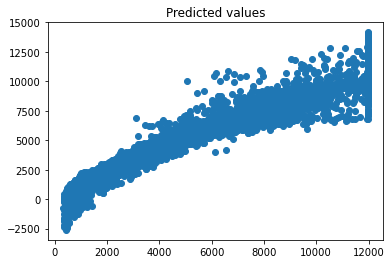

In [61]:
plt.scatter(y_test['price'], y_pred)
plt.title('Predicted values')

In [62]:
for i,j in np.array(lm1.params.reset_index()):  
    print('({}) \* {} +'.format(round(j,2),i),end=' ')

(-3079.94) \* Intercept + (9200.34) \* carat + (12.39) \* depth + (-23.08) \* table + (-1177.39) \* x + (1082.33) \* y + (-640.46) \* z + (387.3) \* cut_Good + (629.89) \* cut_Ideal + (598.67) \* cut_Premium + (502.39) \* cut_Very_Good + (-188.88) \* color_E + (-231.23) \* color_F + (-411.08) \* color_G + (-831.52) \* color_H + (-1330.12) \* color_I + (-1861.61) \* color_J + (3995.22) \* clarity_IF + (2535.91) \* clarity_SI1 + (1712.17) \* clarity_SI2 + (3355.12) \* clarity_VS1 + (3072.16) \* clarity_VS2 + (3776.9) \* clarity_VVS1 + (3766.79) \* clarity_VVS2 + 

### Model - 2

### 2nd Iteration : No Depth

In [63]:
expr1 = 'price ~ carat + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I+ color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [64]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula = expr1, data = data_train).fit()
lm2.params

Intercept       -2250.097434
carat            9208.466179
table             -23.991825
x               -1204.795922
y                1028.705665
z                -514.551536
cut_Good          391.036628
cut_Ideal         626.222939
cut_Premium       594.935812
cut_Very_Good     501.321328
color_E          -188.913411
color_F          -230.978659
color_G          -410.655295
color_H          -831.039621
color_I         -1329.202254
color_J         -1861.135960
clarity_IF       3995.548428
clarity_SI1      2538.310263
clarity_SI2      1714.057219
clarity_VS1      3356.469232
clarity_VS2      3074.025763
clarity_VVS1     3777.960065
clarity_VVS2     3768.187434
dtype: float64

In [65]:
print(lm2.summary()) #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.352e+04
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:45:08   Log-Likelihood:            -1.5373e+05
No. Observations:               18847   AIC:                         3.075e+05
Df Residuals:                   18824   BIC:                         3.077e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2250.0974    264.803     -8.497

In [66]:
# concatenate X and y into a single dataframe 
data_train = pd.concat([X_train, y_train], axis=1)
data_test= pd.concat([X_test,y_test],axis=1)  
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
5030,1.10,63.3,56.0,6.53,6.58,4.15,1,0,0,0,...,0,0,0,0,1,0,0,0,0,4065.0
12108,1.01,64.0,56.0,6.30,6.38,4.06,0,0,0,1,...,0,0,0,0,1,0,0,0,0,5166.0
20181,0.67,60.7,61.4,5.60,5.64,3.41,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1708.0
4712,0.76,59.0,63.0,6.05,5.97,3.47,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2447.0
2548,1.01,62.8,59.0,6.37,6.34,3.99,0,0,1,0,...,0,0,0,0,0,1,0,0,0,6618.0


In [67]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True) 
data_test.rename(columns = {'cut_Very Good' : 'cut_Very_Good'},inplace = True)

In [68]:
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))))

In [69]:
np.sqrt(mse)

61.066782357227744

In [70]:
for i,j in np.array(lm2.params.reset_index()):  
    print('({}) \* {} +'.format(round(j,2),i),end=' ')

(-2250.1) \* Intercept + (9208.47) \* carat + (-23.99) \* table + (-1204.8) \* x + (1028.71) \* y + (-514.55) \* z + (391.04) \* cut_Good + (626.22) \* cut_Ideal + (594.94) \* cut_Premium + (501.32) \* cut_Very_Good + (-188.91) \* color_E + (-230.98) \* color_F + (-410.66) \* color_G + (-831.04) \* color_H + (-1329.2) \* color_I + (-1861.14) \* color_J + (3995.55) \* clarity_IF + (2538.31) \* clarity_SI1 + (1714.06) \* clarity_SI2 + (3356.47) \* clarity_VS1 + (3074.03) \* clarity_VS2 + (3777.96) \* clarity_VVS1 + (3768.19) \* clarity_VVS2 + 

## 2	Problem Statement: 2

In [71]:
hp_df= pd.read_csv('Holiday_Package.csv')

In [72]:
hp_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [73]:
hp_df.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [74]:
#drop the column Unnamed: 0
hp_df=hp_df.drop(columns='Unnamed: 0', axis=1)

In [75]:
hp_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [76]:
hp_df.shape

(872, 7)

In [77]:
hp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [78]:
#Null check
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [79]:
hp_df.isna().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

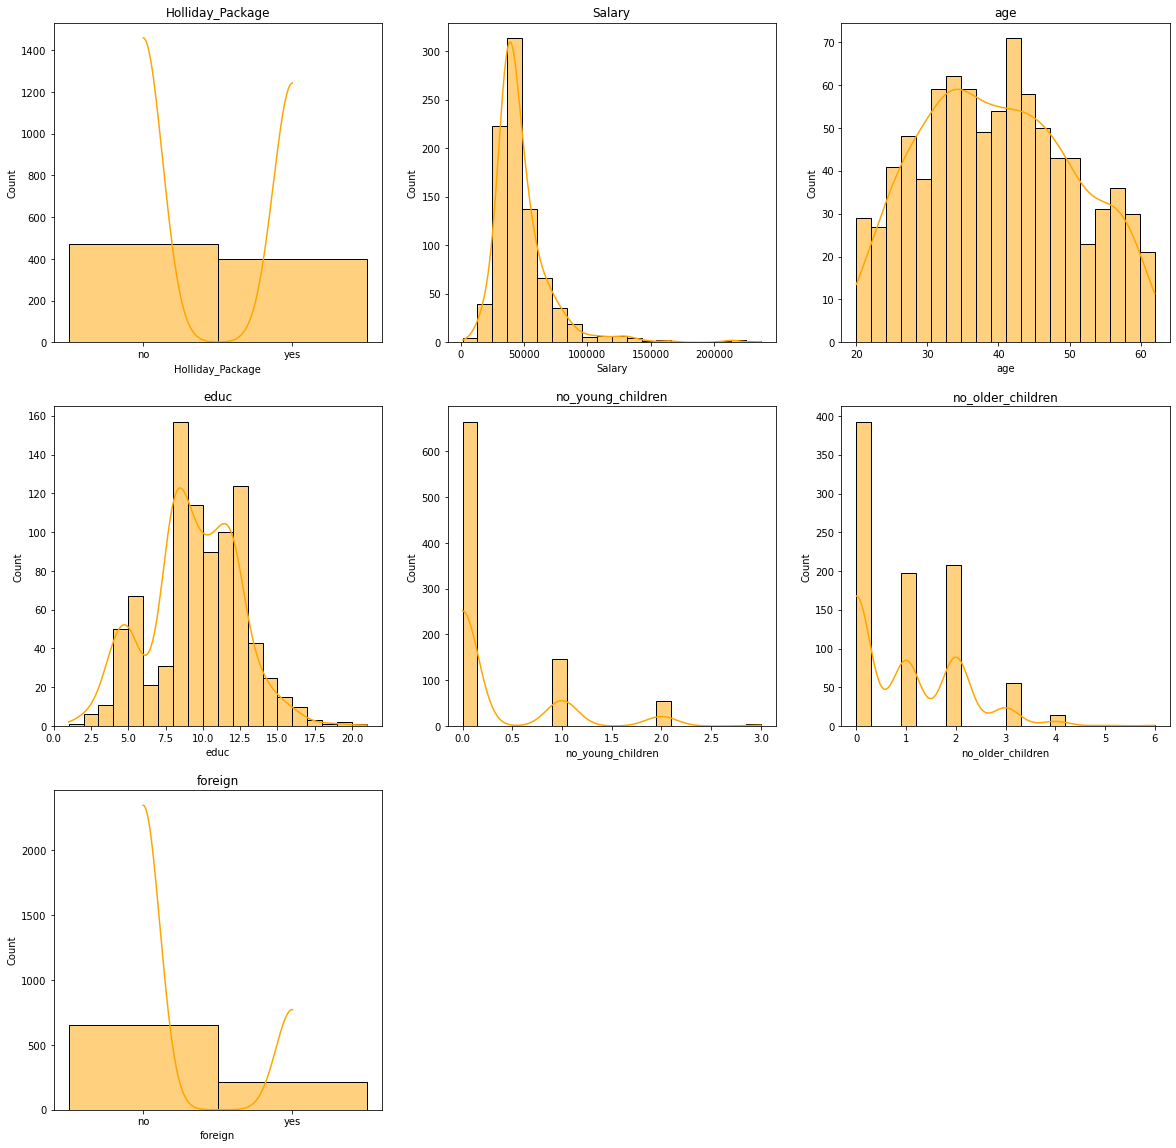

In [80]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1);
plt.title('Holliday_Package')
sns.histplot(hp_df.Holliday_Package,bins=20,color="orange",kde=True);

plt.subplot(3,3,2)
plt.title('Salary')
sns.histplot(hp_df.Salary,bins=20,color="orange",kde=True);

plt.subplot(3,3,3)
plt.title('age')
sns.histplot(hp_df.age,bins=20,color="orange",kde=True);

plt.subplot(3,3,4)
plt.title('educ')
sns.histplot(hp_df.educ,bins=20,color="orange",kde=True);

plt.subplot(3,3,5)
plt.title('no_young_children')
sns.histplot(hp_df.no_young_children,bins=20,color="orange",kde=True);

plt.subplot(3,3,6)
plt.title('no_older_children')
sns.histplot(hp_df.no_older_children,bins=20,color="orange",kde=True);

plt.subplot(3,3,7)
plt.title('foreign')
sns.histplot(hp_df.foreign,bins=20,color="orange",kde=True);

In [81]:
dups=hp_df.duplicated()
print('Number of duplicate rows = %d'%(dups.sum()))

Number of duplicate rows = 0


In [82]:
for feature in hp_df.columns: 
    if hp_df[feature].dtype == 'object': 
        print(feature)
        print(hp_df[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




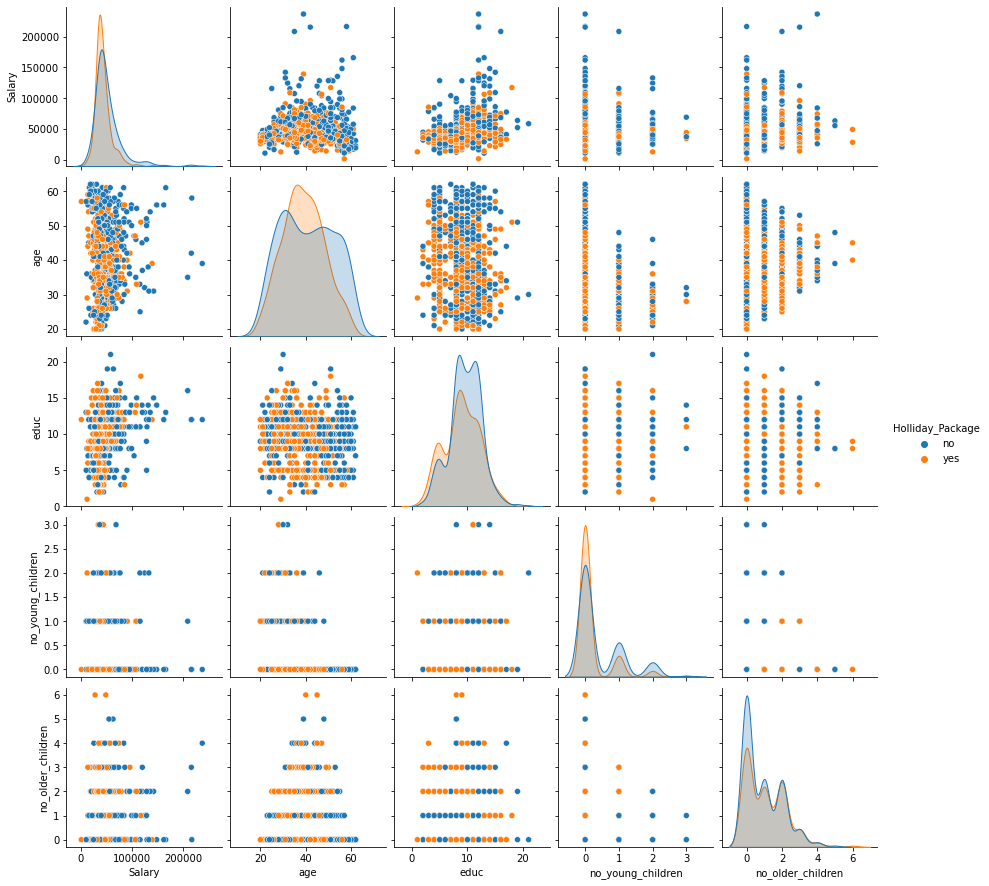

In [83]:
sns.pairplot(hp_df,diag_kind='kde', corner=False, hue='Holliday_Package');

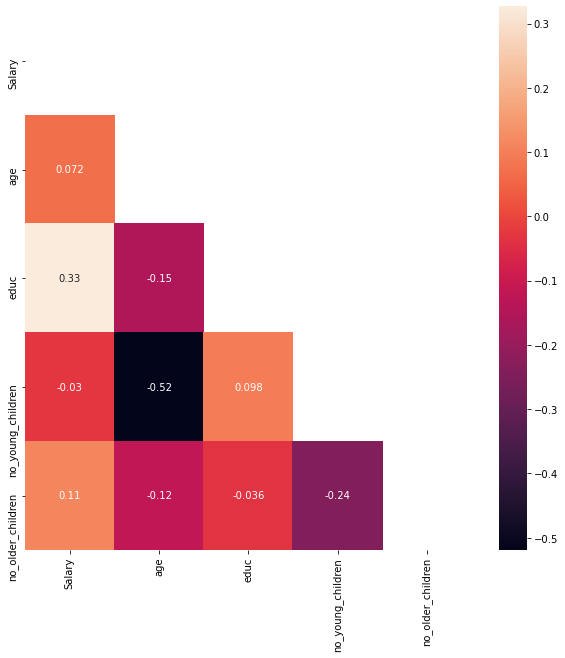

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(hp_df.corr(),annot=True,mask =np.triu(np.ones_like(hp_df.corr(), dtype=bool)));

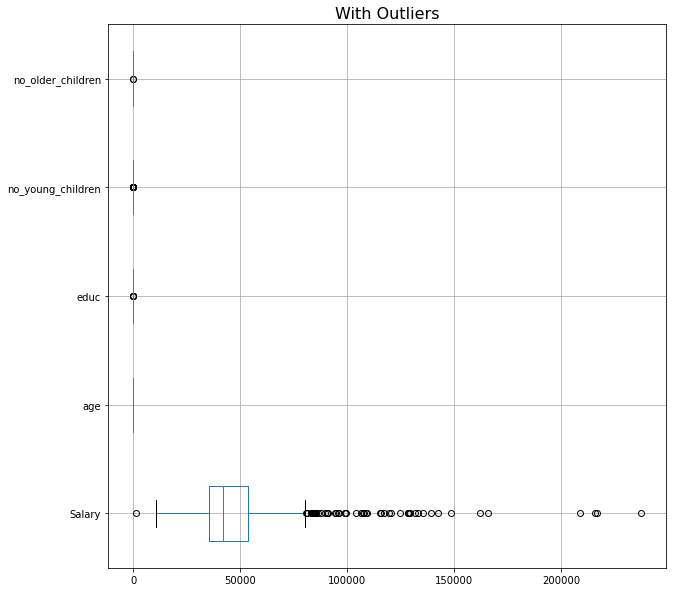

In [85]:
# construct box plot for continuous variables
cont=hp_df.dtypes[(hp_df.dtypes!='uint8') & (hp_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
hp_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [86]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [87]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [88]:
for column in hp_df[['Salary', 'age', 'educ', 'no_young_children',
       'no_older_children']].columns:
    lr,ur=remove_outlier(hp_df[column])
    hp_df[column]=np.where(hp_df[column]>ur,ur,hp_df[column])
    hp_df[column]=np.where(hp_df[column]<lr,lr,hp_df[column])

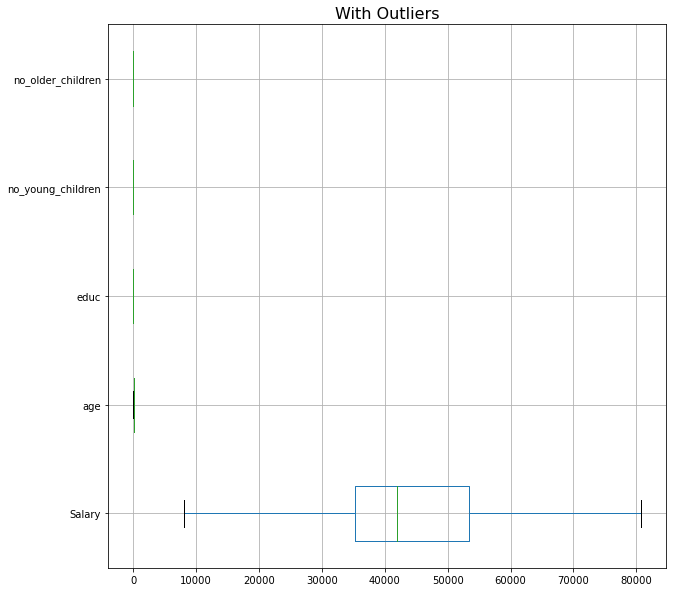

In [89]:
# construct box plot for continuous variables
cont=hp_df.dtypes[(hp_df.dtypes!='uint8') & (hp_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
hp_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [90]:
hp_lda = hp_df.copy()

In [91]:
hp_lda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


### Logistic Regression

In [92]:
hp_df= pd.get_dummies(hp_df, columns=['Holliday_Package','foreign'],drop_first=True)

In [93]:
hp_df.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [94]:
X=hp_df.drop(columns='Holliday_Package_yes', axis=1)

In [95]:
#divide  the dependent and independent variables
y=hp_df['Holliday_Package_yes']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [97]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (610, 6)
X_test (262, 6)
y_train (610,)
y_test (262,)


In [98]:
y_train.value_counts(1)

0    0.534426
1    0.465574
Name: Holliday_Package_yes, dtype: float64

In [99]:
y_test.value_counts(1)

0    0.553435
1    0.446565
Name: Holliday_Package_yes, dtype: float64

In [100]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [101]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [102]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.696807,0.303193
1,0.332213,0.667787
2,0.620128,0.379872
3,0.686886,0.313114
4,0.354964,0.645036


#### Train Data

In [103]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6409836065573771

AUC: 0.667


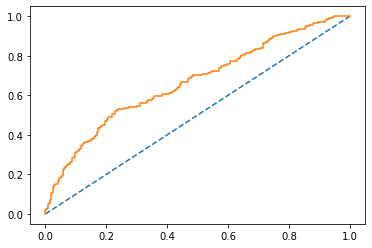

In [104]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [105]:
confusion_matrix(y_train, ytrain_predict)

array([[265,  61],
       [158, 126]], dtype=int64)

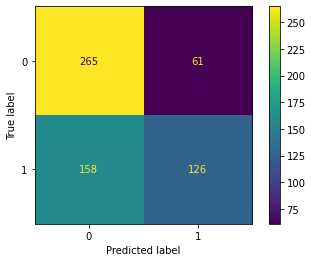

In [106]:
plot_confusion_matrix(model,X_train,y_train);

In [107]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.67      0.44      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



#### Test Data

In [108]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6297709923664122

AUC: 0.667


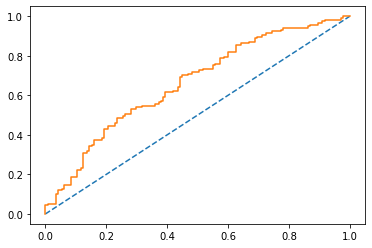

In [109]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [110]:
confusion_matrix(y_test, ytest_predict)

array([[113,  32],
       [ 65,  52]], dtype=int64)

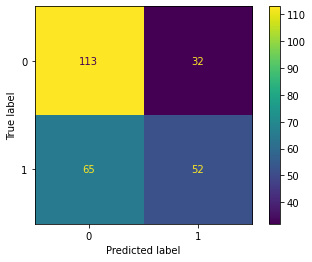

In [111]:
plot_confusion_matrix(model,X_test,y_test);

In [112]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



In [113]:
model.coef_

array([[-1.85343188e-05, -8.97528447e-03,  6.63947479e-02,
         0.00000000e+00,  1.86667649e-01,  1.33177905e+00]])

In [114]:
model.intercept_

array([-0.05269955])

In [115]:
pred_prob_train=model.predict_proba#######

# Training Data Probability Prediction
pred_prob_train_logit = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_logit = model.predict_proba(X_test)

AUC: 0.667
AUC: 0.667


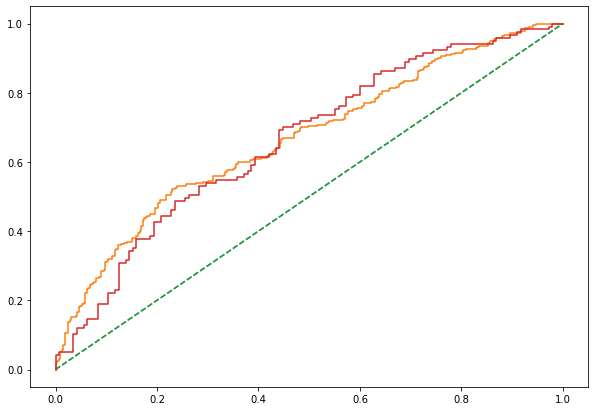

In [116]:
# AUC and ROC for the training data
plt.figure(figsize=(10,7))

# calculate AUC
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# AUC and ROC for the test data

# calculate AUC
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.show()

#### Grid Search

In [117]:
# Applying GridSearchCV for Logistic Regression
grid={'penalty':['l2','none'],
'solver':['sag','lbfgs'],
'tol':[0.0001,0.00001]}

In [118]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [119]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [120]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [121]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [122]:
best_model = grid_search.best_estimator_

In [123]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [124]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.591060,0.408940
1,0.540422,0.459578
2,0.548785,0.451215
3,0.598272,0.401728
4,0.530048,0.469952


              precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610
 



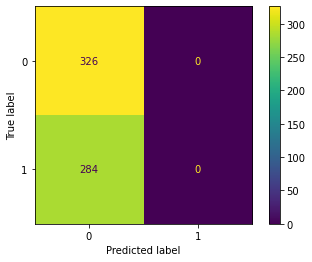

In [125]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       145
           1       0.00      0.00      0.00       117

    accuracy                           0.55       262
   macro avg       0.28      0.50      0.36       262
weighted avg       0.31      0.55      0.39       262
 



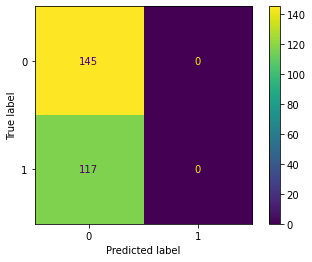

In [126]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## LDA

In [127]:
hp_lda.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [128]:
#Convert the categorical variable "foreign" to numeric
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
hp_lda['foreign']=labelEncoder.fit_transform(hp_lda['foreign'])
hp_lda['Holliday_Package']=labelEncoder.fit_transform(hp_lda['Holliday_Package'])

In [129]:
hp_lda.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0


In [130]:
hp_lda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int32  
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int32  
dtypes: float64(5), int32(2)
memory usage: 41.0 KB


In [131]:
X=hp_lda.drop(columns='Holliday_Package', axis=1)
y=hp_lda['Holliday_Package']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [133]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [134]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

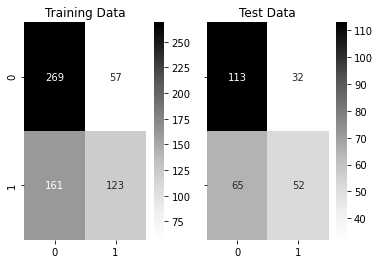

In [135]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [136]:
#Score
print("The score of LDA model on train data is: ",round(clf.score(X_train, y_train),3))
print("The score of LDA model on teat data is: ",round(clf.score(X_test, y_test),3))

The score of LDA model on train data is:  0.643
The score of LDA model on teat data is:  0.63


In [137]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



In [138]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [139]:
pred_prob_train[:,1]

array([0.29232736, 0.71218516, 0.25941094, 0.32072989, 0.48465835,
       0.6589039 , 0.37617241, 0.3215668 , 0.21855144, 0.44852479,
       0.34499238, 0.24274809, 0.3626753 , 0.38323241, 0.46971577,
       0.70744216, 0.82618411, 0.41298232, 0.42611419, 0.74640861,
       0.53722701, 0.2076308 , 0.49742148, 0.41181601, 0.33751753,
       0.41312542, 0.44985376, 0.34497108, 0.75805699, 0.32832053,
       0.68478009, 0.70307903, 0.43421205, 0.31621611, 0.42003704,
       0.37019078, 0.41712146, 0.38318837, 0.34120849, 0.35763096,
       0.38256474, 0.48738393, 0.37220926, 0.67726743, 0.32788312,
       0.73236176, 0.56328541, 0.39077477, 0.38782118, 0.46711305,
       0.41904625, 0.38570596, 0.49491867, 0.36655139, 0.80610163,
       0.40853665, 0.48606621, 0.22836863, 0.73551411, 0.45068862,
       0.26261954, 0.44939141, 0.49185238, 0.71908308, 0.35292084,
       0.32707741, 0.48779143, 0.74857005, 0.22200694, 0.46730359,
       0.3384402 , 0.30639497, 0.46221896, 0.70205593, 0.39421

AUC for the Training Data: 0.667


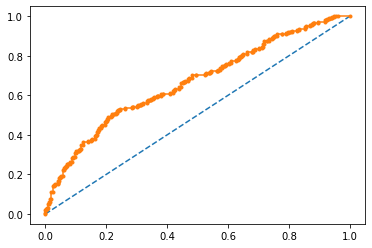

In [140]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

AUC for the Test Data: 0.662


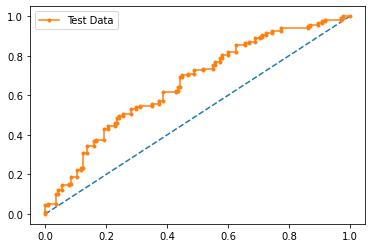

In [141]:



# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4656
F1 Score 0.6353 

Confusion Matrix


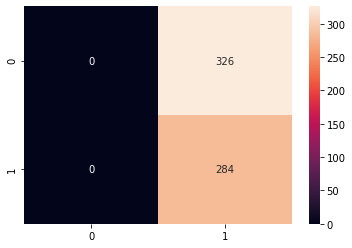

0.2 

Accuracy Score 0.4721
F1 Score 0.6382 

Confusion Matrix


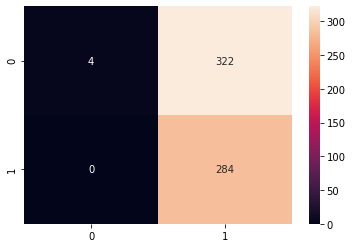

0.3 

Accuracy Score 0.523
F1 Score 0.6447 

Confusion Matrix


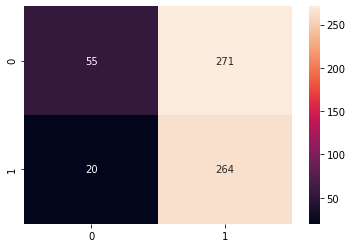

0.4 

Accuracy Score 0.5967
F1 Score 0.618 

Confusion Matrix


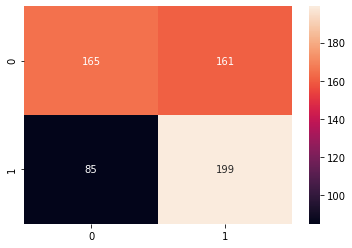

0.5 

Accuracy Score 0.6426
F1 Score 0.5302 

Confusion Matrix


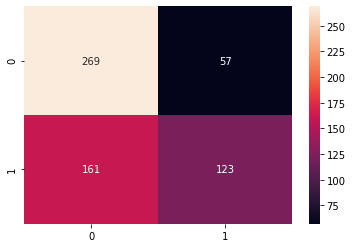

0.6 

Accuracy Score 0.6328
F1 Score 0.4717 

Confusion Matrix


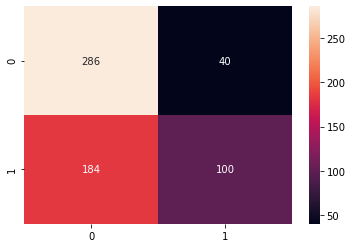

0.7 

Accuracy Score 0.6082
F1 Score 0.3558 

Confusion Matrix


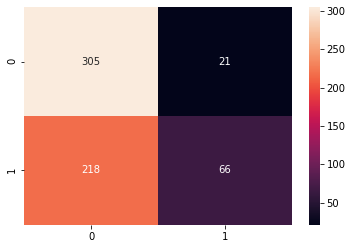

0.8 

Accuracy Score 0.5377
F1 Score 0.014 

Confusion Matrix


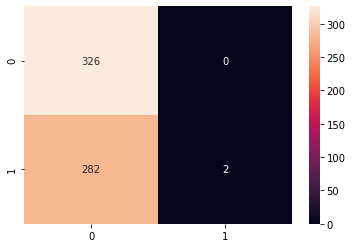

0.9 

Accuracy Score 0.5344
F1 Score 0.0 

Confusion Matrix


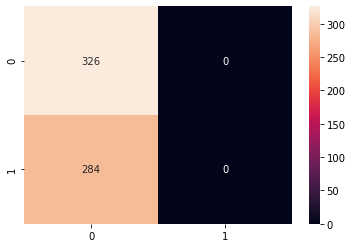

In [142]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [143]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

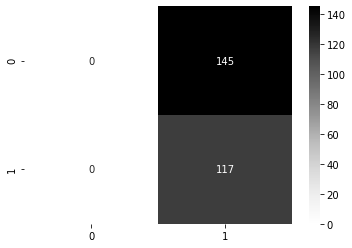

In [144]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [145]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.45      1.00      0.62       117

    accuracy                           0.45       262
   macro avg       0.22      0.50      0.31       262
weighted avg       0.20      0.45      0.28       262
 



##                                                                          END